# C4021 - Group Project 2.3

### NAME: Andrew Kenny
### Student ID: 18203442

## Effects of Crime on Average House Price
------

### Description
Linear regression will be used to identify the impact, if any, of crime on average house prices in Ireland.

To do so, a dataset will be created containing information on crimes committed and average house prices for towns in Ireland. A linear regression model will be fitted using Scikit Learn to identify whether the crime parameters are accurate predictors of average house prices.

Should the predictions of the Linear Regression model accurately match those in the dataset, it can be said that crime has an impact on average house prices in Ireland. If not, then it can be said that it does not have an impact.

### Databases
A custom dataset was created from three sources to apply the analysis:
- **Residential Property Price Register:** https://www.propertypriceregister.ie/website/npsra/pprweb.nsf/PPRDownloads?OpenForm
- **Crimes at Garda Stations Level:** https://data.gov.ie/dataset/crimes-at-garda-stations-level-2010-2016
- **Census 2016 Preliminary Results:** https://data.gov.ie/dataset/census-2016-preliminary-results

The **Residential Price Property Register** is compiled from data which is filed for stamp duty purposes with the Revenue Commissioners. This data was used to calculate the Average House Price for each town in Ireland (where available), based on houses sold over the past 3 years.

The **Crimes at Garda Stations** database is compiled from CSO data and contains details of criminal offences recorded in the 563 Garda Stations in Ireland between 2004 and 2016. This data was used to calculate the Total Crimes recorded for those towns.

The **Census 2016 Preliminary Results** database is based on the results are the initial count of the 2016 census as released by the CSO. This data was used to calculate a per capita Crime Rate for each town using the total criminal offences from the previous database.

The resulting dataset for analysis contains 563 rows representing towns in Ireland, with each column containing the related **House_Price**, **Total Crimes** and **Crime_Rate**.

### Sources
------

Each file should list the sources of applied techniques where you have significantly duplicated 3rd party work. Providing links under the above 4 headings is sufficient. Where you have not used 3rd partly work significantly, please state this explicitly.

#### Training data
- Deep Learning & Frameworks Lab Week 6

#### Pre-processing

#### Algorithm training and evaluation
- http://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html#sphx-glr-auto-examples-linear-model-plot-ols-py
- https://www.kaggle.com/andyxie/beginner-scikit-learn-linear-regression-tutorial

#### Visualisation of outputs
- https://bigdata-madesimple.com/how-to-run-linear-regression-in-python-scikit-learn/


### Contributions
------

Briefly describe the contributions of each group member to the following aspects:

#### Training data

#### Pre-processing
- Inspiration taken from Abhi's solution for handling the null values

#### Algorithm training and evaluation

#### Visualisation of outputs


## Loading/ Creating Data
-----

In [678]:
import numpy as np
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt

In [679]:
#Load the dataset and convert to pandas data frame
dataframe = pd.read_csv("crime_houseprice_dataset.csv")

#Check dimensions
dataframe.shape

(563, 3)

In [680]:
#View first 5 rows
dataframe.head(5)

,Total_Crimes,Crime_Rate,House_Price
0,523,NaN,NaN
1,75613,NaN,NaN
2,672,NaN,NaN
3,1968,NaN,NaN
4,6536,NaN,NaN


## Pre-processing
-----

In [681]:
# Identify null values 
dataframe.isnull().sum()

Total_Crimes     0
Crime_Rate      44
House_Price     11
dtype: int64

In [682]:
# Drop rows containing null values
dataframe.dropna(axis=0, inplace = True)

#Check new dimensions
dataframe.shape

(516, 3)

In [683]:
#View first 5 rows after null values removed
dataframe.head(5)

,Total_Crimes,Crime_Rate,House_Price
44,665,2.09,142829.0
45,66231,0.83,275000.0
46,81247,1.07,321389.0
47,74505,1.00,242764.0
48,67122,1.25,128196.0


In [684]:
#Assign X
X = dataframe.drop('House_Price', axis = 1)

#Assign Y
Y = dataframe['House_Price']

### Explore Data

In [685]:
#Finding Average House Price in dataset
avg = sum(dataframe.House_Price) / len(dataframe.House_Price) 
print('Average House Price: %.2f' % avg)

#Finding Average Crime Rate in dataset
cr_avg = sum(dataframe.Crime_Rate) / len(dataframe.Crime_Rate) 
print('Average Crime Rate: %.2f' %cr_avg)

#Finding Average Total Crimes in dataset
tc_avg = sum(dataframe.Total_Crimes) / len(dataframe.Total_Crimes) 
print('Average Total Crimes: %.2f' %tc_avg)

Average House Price: 171742.46
Average Crime Rate: 1.45
Average Total Crimes: 4904.11


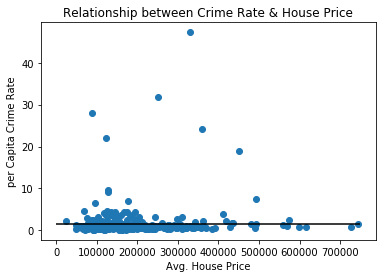

In [686]:
# Scatterplot showing relationship between per Capita Crime and House Price
# Line indicates average per Capita Crime Rate
plt.scatter(dataframe.House_Price, dataframe.Crime_Rate)
plt.ylabel("per Capita Crime Rate")
plt.xlabel("Avg. House Price")
plt.title("Relationship between Crime Rate & House Price")
plt.hlines(y=1.45, xmin = 0, xmax = 750000)
plt.show()

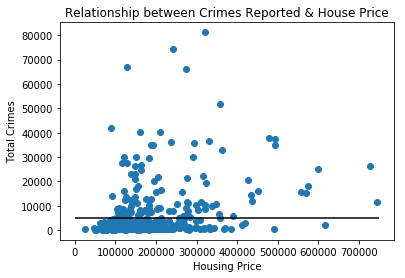

In [688]:
# Scatterplot showing relationship between Total Crimes and House Price
# Line indicates average Total Crimes Reported
plt.scatter(dataframe.House_Price, dataframe.Total_Crimes)
plt.ylabel("Total Crimes")
plt.xlabel("Housing Price")
plt.title("Relationship between Crimes Reported & House Price")
plt.hlines(y=4904, xmin = 0, xmax = 750000)
plt.show()

## Training
-----

In [689]:
# Split dataset into training and test sets (80/20 split)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(412, 2)
(104, 2)
(412,)
(104,)


In [690]:
# Set up Linear Regression model
lm = linear_model.LinearRegression()

In [691]:
# Train the model using the training sets
lm.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [692]:
# Check Score
lm.score(X_test, Y_test)

0.17857099027532053

## Evaluation
------

In [693]:
# Get Coefficients
print('Coefficients: \n', lm.coef_)

Coefficients: 
 [  3.09723683 577.44292538]


In [694]:
# Get Intercept
print('Intercept: \n', lm.intercept_)

Intercept: 
 156681.8179716004


In [695]:
# Predict data based on testset
Y_pred = lm.predict(X_test)

print('Prediction: \n', Y_pred[0:10])

Prediction: 
 [180434.9378424  158397.83937769 165875.09060552 161708.04220518
 159074.56025916 158354.16421014 162545.30261652 273149.93310461
 158573.64798092 161292.70334332]


In [696]:
# Get Mean Squared Error
print("Mean squared error: %.2f" % mean_squared_error(Y_test, Y_pred))

Mean squared error: 5772473350.14


In [697]:
# Explained variance score (1 is perfect prediction)
print('Variance score: %.2f' % r2_score(Y_test, Y_pred))

Variance score: 0.18


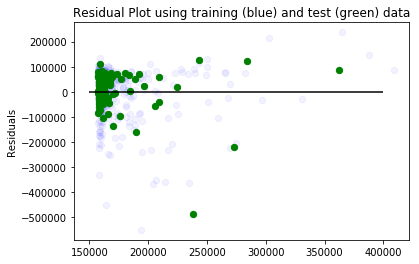

In [698]:
# Residual plots - visualise errors in data
# Data should be randomly scattered around line zero

plt.scatter(lm.predict(X_train), lm.predict(X_train) - Y_train, c='b', s = 40, alpha = 0.05)
plt.scatter(lm.predict(X_test), lm.predict(X_test) - Y_test, c='g', s = 40)
plt.hlines(y = 0, xmin = 150000, xmax = 400000)
plt.title('Residual Plot using training (blue) and test (green) data')
plt.ylabel('Residuals')
plt.show()

## Outputs & Visualisations
------

In [699]:
#Use model to predict average house prices
lm.predict(X)[0:10]

array([159948.33618007, 362294.18833429, 408940.88293163, 388018.89119386,
       365296.3523818 , 225368.50061115, 269292.88095759, 265683.91688341,
       267534.80437674, 249300.21719588])

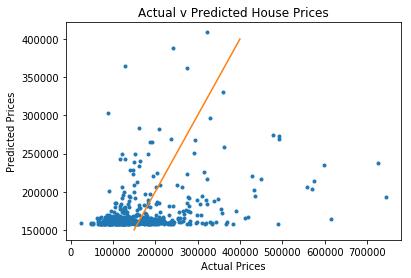

In [700]:
# Plot predicted prices and actual prices
plt.plot(dataframe.House_Price, lm.predict(X), '.')

# plots line (perfect prediction all would fall on this line)
x = np.linspace(150000, 400000, 10)
y = x
plt.ylabel("Predicted Prices")
plt.xlabel("Actual Prices")
plt.title("Actual v Predicted House Prices")
plt.plot(x, y)

plt.show()

## Conclusion
------
Although a correlation can be observed between the number of Crimes Reported/ per Capita Crime Rate and Average House Price, the fitted Linear Regression model does not adequately predict House Prices. This indicates that Crime does not have an impact on house prices in Ireland.